In [1]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

/home/gurhancoban/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("dataTest.csv")

In [3]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [4]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,287.0,1.212885e+03,1.098559e+03,1.529400e+02,3.211545e+02,5.699740e+02,2.196664e+03,4.744949e+03
packetLoss,287.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,287.0,7.430314e+01,3.435238e+01,1.300000e+01,5.250000e+01,7.400000e+01,9.000000e+01,3.580000e+02
hopCount,287.0,3.066202e+00,1.033938e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,287.0,4.128920e+06,1.311901e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,287.0,3.120538e+04,2.679657e+04,4.751573e+02,8.919753e+03,2.581596e+04,4.496144e+04,1.770201e+05
psnr,287.0,3.348263e+01,1.633370e+01,1.267172e+01,2.133116e+01,2.304355e+01,5.505260e+01,5.506194e+01
ssim_first,287.0,9.130560e-01,1.298427e-01,5.138590e-01,9.020465e-01,9.608250e-01,9.997650e-01,9.997650e-01
ssim_second,287.0,1.996755e+01,1.245596e+01,3.132379e+00,1.008981e+01,1.406988e+01,3.628266e+01,3.628266e+01
type,287.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


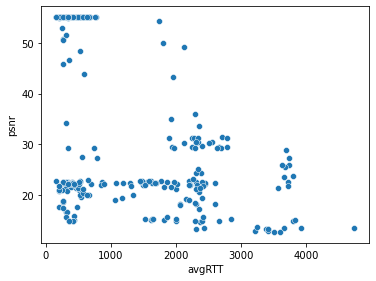

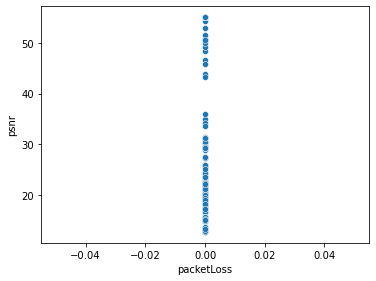

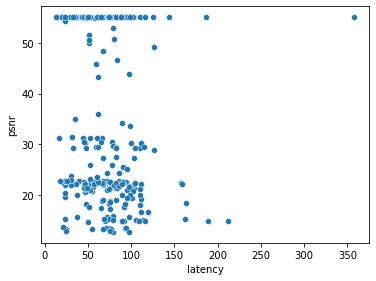

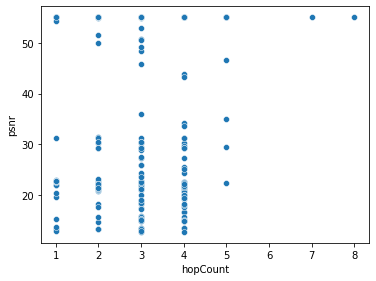

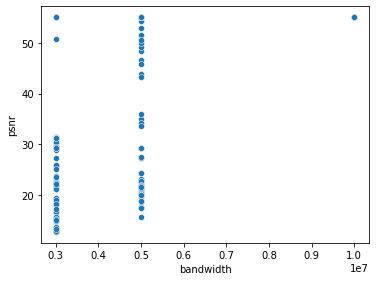

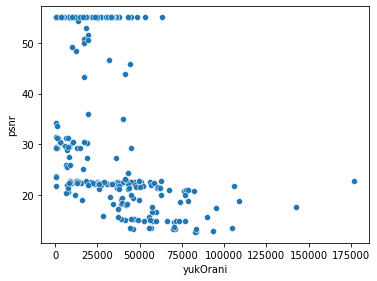

In [5]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [6]:
# sns.displot(df)

In [7]:
y=df["ssim_first"]
x=df.drop(["host","ssim_first","ssim_second","type","psnr","server"],axis="columns")
y


0      0.985150
1      0.985150
2      0.956348
3      0.960533
4      0.958593
         ...   
283    0.999765
284    0.999765
285    0.999765
286    0.999765
287    0.999765
Name: ssim_first, Length: 287, dtype: float64

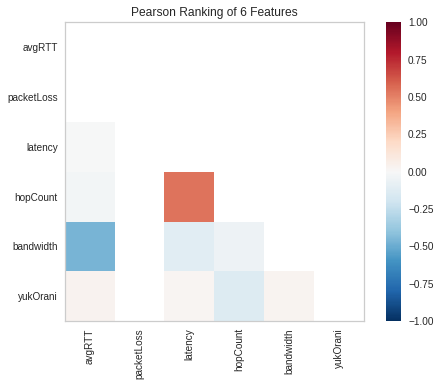

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [8]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [9]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,287.0,1.212885e+03,1.098559e+03,1.529400e+02,3.211545e+02,5.699740e+02,2.196664e+03,4.744949e+03
packetLoss,287.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,287.0,7.430314e+01,3.435238e+01,1.300000e+01,5.250000e+01,7.400000e+01,9.000000e+01,3.580000e+02
hopCount,287.0,3.066202e+00,1.033938e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,287.0,4.128920e+06,1.311901e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,287.0,3.120538e+04,2.679657e+04,4.751573e+02,8.919753e+03,2.581596e+04,4.496144e+04,1.770201e+05


In [10]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.4, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.6101268431639972


In [12]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.4556675149482664 test: 0.41769561170454794
max_depth : 2 --> score r2 : eğitim:0.7717527245034788 test: 0.6964523361673416
max_depth : 3 --> score r2 : eğitim:0.8736266496497183 test: 0.7637697060836077
max_depth : 4 --> score r2 : eğitim:0.9266015650365726 test: 0.7831684486467929
max_depth : 5 --> score r2 : eğitim:0.9515428568184325 test: 0.7928337536593459
max_depth : 6 --> score r2 : eğitim:0.9639799647710608 test: 0.7977287036889328
max_depth : 7 --> score r2 : eğitim:0.967869265622545 test: 0.7935688077908628
max_depth : 8 --> score r2 : eğitim:0.9723964298206813 test: 0.8002087908337903
max_depth : 9 --> score r2 : eğitim:0.97353004477702 test: 0.7967941320118344
max_depth : 10 --> score r2 : eğitim:0.9728091409641909 test: 0.8066450161873244
max_depth : 11 --> score r2 : eğitim:0.9704685972925432 test: 0.7883392395871461
max_depth : 12 --> score r2 : eğitim:0.9738354433434108 test: 0.7974852075037939
max_depth : 13 --> score r2 : eğitim:0.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.7682269186926272


n_neigbors : 2 --> score r2 : eğitim:0.9421110237645797 test: 0.7826820702827838
n_neigbors : 3 --> score r2 : eğitim:0.911092770035594 test: 0.7966698625164412
n_neigbors : 4 --> score r2 : eğitim:0.8861520675114527 test: 0.7877564735333066
n_neigbors : 5 --> score r2 : eğitim:0.8699487415615698 test: 0.7907390174948893
n_neigbors : 6 --> score r2 : eğitim:0.8564678790825366 test: 0.8044245220427438
n_neigbors : 7 --> score r2 : eğitim:0.8428940684064975 test: 0.7980872160873287
n_neigbors : 8 --> score r2 : eğitim:0.8280325454464799 test: 0.8009133979631223
n_neigbors : 9 --> score r2 : eğitim:0.8068621281828541 test: 0.7898885459727938
n_neigbors : 10 --> score r2 : eğitim:0.7935766877720152 test: 0.7808377027870794
n_neigbors : 11 --> score r2 : eğitim:0.7754331847420322 test: 0.7838505044093157
n_neigbors : 12 --> score r2 : eğitim:0.7632219822523892 test: 0.7831817994722341
n_neigbors : 13 --> score r2 : eğitim:0.7622985982471565 test: 0.772685492613097
n_neigbors : 14 --> score 

In [14]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.4170624164697422 test: 0.33833181285363223
max_depth : 2 --> score r2 : eğitim:0.7077311263151833 test: 0.6166403009965513
max_depth : 3 --> score r2 : eğitim:0.8276444768084776 test: 0.6862790464608919
max_depth : 4 --> score r2 : eğitim:0.9076956029030733 test: 0.7232031218534899


max_depth : 5 --> score r2 : eğitim:0.9460987482772625 test: 0.7508193604467955
max_depth : 6 --> score r2 : eğitim:0.9748010255400577 test: 0.7145757212429049
max_depth : 7 --> score r2 : eğitim:0.9900654050272356 test: 0.6735711102529702
max_depth : 8 --> score r2 : eğitim:0.9982015052558671 test: 0.7132852936139678
max_depth : 9 --> score r2 : eğitim:0.9998733581252383 test: 0.6888107841111466
max_depth : 10 --> score r2 : eğitim:0.9999963856494125 test: 0.7129287008962927
max_depth : 11 --> score r2 : eğitim:0.9999990040313548 test: 0.6895898016494579
max_depth : 12 --> score r2 : eğitim:1.0 test: 0.711065999645851
max_depth : 13 --> score r2 : eğitim:1.0 test: 0.7272431889816413
max_depth : 14 --> score r2 : eğitim:1.0 test: 0.7131285767366649
max_depth : 15 --> score r2 : eğitim:1.0 test: 0.6888557857856483
max_depth : 16 --> score r2 : eğitim:1.0 test: 0.6929486454292006
max_depth : 17 --> score r2 : eğitim:1.0 test: 0.6791365506017417
max_depth : 18 --> score r2 : eğitim:1.0 te

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7361360826377574 test: 0.6654024924245122
max_depth : 2 --> score r2 : eğitim:0.9199758824508039 test: 0.7772612217877246
max_depth : 3 --> score r2 : eğitim:0.9862214043372287 test: 0.7782425917932668
max_depth : 4 --> score r2 : eğitim:0.9985505436563857 test: 0.763786514975455
max_depth : 5 --> score r2 : eğitim:0.9998774771542305 test: 0.760290865804083
max_depth : 6 --> score r2 : eğitim:0.9999943264146197 test: 0.7625852735309673
max_depth : 7 --> score r2 : eğitim:0.9999999578308142 test: 0.734467779503726
max_depth : 8 --> score r2 : eğitim:0.9999999987637115 test: 0.7183616952282406
max_depth : 9 --> score r2 : eğitim:0.999999999280162 test: 0.7312235668754976


In [16]:
tahminKNN

array([0.91177542, 0.93915005, 0.99241789, 0.99547542, 0.95731516,
       0.89579421, 0.99385784, 0.964674  , 0.99241789, 0.93915005,
       0.99695816, 0.89856942, 0.99385784, 0.81745695, 0.76044632,
       0.92799253, 0.95084532, 0.95300058, 0.67723837, 0.66415768,
       0.95495721, 0.93915005, 0.99385784, 0.99385784, 0.96862879,
       0.96577095, 0.98447637, 0.99448089, 0.99695816, 0.86489247,
       0.97502695, 0.99547542, 0.93999605, 0.99547532, 0.95794021,
       0.97335668, 0.97484205, 0.97163363, 0.97484205, 0.91544426,
       0.97583395, 0.96615547, 0.81745695, 0.966016  , 0.99695816,
       0.964674  , 0.96119921, 0.99227342, 0.71382011, 0.99241789,
       0.96577095, 0.97587442, 0.97335668, 0.95445484, 0.964674  ,
       0.96977637, 0.98447637, 0.95780684, 0.99695816, 0.966016  ,
       0.99385784, 0.88839353, 0.95801721, 0.71382011, 0.96839816,
       0.93999605, 0.71382011, 0.95526237, 0.81745695, 0.95794021,
       0.96862879, 0.66415768, 0.81745695, 0.96577095, 0.90036

In [17]:
yTest

9      0.953867
256    0.960707
145    0.999765
214    0.999196
231    0.958559
         ...   
181    0.922047
272    0.536660
280    0.579837
176    0.999739
69     0.960238
Name: ssim_first, Length: 115, dtype: float64

In [18]:
yTrain

127    0.999765
2      0.956348
105    0.999765
77     0.999765
116    0.891909
         ...   
189    0.942673
71     0.999765
107    0.999756
271    0.534366
103    0.999765
Name: ssim_first, Length: 172, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [20]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.6101268431640106


In [21]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.5756016044358461
n_neigbors : 2 --> score r2 : eğitim:0.9195352875948059 test: 0.7552654876099867
n_neigbors : 3 --> score r2 : eğitim:0.8653325239368217 test: 0.7375834560504717
n_neigbors : 4 --> score r2 : eğitim:0.8197126380466637 test: 0.7013091374375011
n_neigbors : 5 --> score r2 : eğitim:0.8006444765536115 test: 0.683499439314574
n_neigbors : 6 --> score r2 : eğitim:0.7797843596389133 test: 0.7152919690408804
n_neigbors : 7 --> score r2 : eğitim:0.7739567232988614 test: 0.7053554685777239
n_neigbors : 8 --> score r2 : eğitim:0.7506945200471465 test: 0.6964552426653907
n_neigbors : 9 --> score r2 : eğitim:0.7307892663224924 test: 0.6881948317020707
n_neigbors : 10 --> score r2 : eğitim:0.7128013360308233 test: 0.6839188029499284
n_neigbors : 11 --> score r2 : eğitim:0.6896498654753318 test: 0.6597824877602256
n_neigbors : 12 --> score r2 : eğitim:0.6569956828440189 test: 0.6656199214367844
n_neigbors : 13 --> score r2 : eğitim:0.6

In [22]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,bootstrap=True,criterion="friedman_mse",max_features='log2',max_leaf_nodes=None,n_estimators=100,n_jobs=1,random_state=42)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.3874254710650973 test: 0.35185572060823533
max_depth : 2 --> score r2 : eğitim:0.6013927001683943 test: 0.5370962689966593
max_depth : 3 --> score r2 : eğitim:0.7528984900407416 test: 0.6652549026991985
max_depth : 4 --> score r2 : eğitim:0.8411206362248024 test: 0.7206328917814472
max_depth : 5 --> score r2 : eğitim:0.9048455553643331 test: 0.7691801360682557
max_depth : 6 --> score r2 : eğitim:0.9339992593194604 test: 0.7647488923279077
max_depth : 7 --> score r2 : eğitim:0.9527826100503558 test: 0.771524302644798
max_depth : 8 --> score r2 : eğitim:0.9615327887894974 test: 0.7881862393472572
max_depth : 9 --> score r2 : eğitim:0.9654514137983471 test: 0.7892640992135224
max_depth : 10 --> score r2 : eğitim:0.9691418420558925 test: 0.7811895319678201
max_depth : 11 --> score r2 : eğitim:0.9672669341405504 test: 0.7872287900300488
max_depth : 12 --> score r2 : eğitim:0.964220937811588 test: 0.7787204068242857
max_depth : 13 --> score r2 : eğitim:0

In [23]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.4170624164697422 test: 0.33833181285363223
max_depth : 2 --> score r2 : eğitim:0.7077311263151833 test: 0.6166403009965514
max_depth : 3 --> score r2 : eğitim:0.8276444768084776 test: 0.6862790464608919
max_depth : 4 --> score r2 : eğitim:0.9076956029030733 test: 0.6757736052182979
max_depth : 5 --> score r2 : eğitim:0.9460987482772625 test: 0.724602031580255
max_depth : 6 --> score r2 : eğitim:0.9748010255400577 test: 0.7145756820044222
max_depth : 7 --> score r2 : eğitim:0.9900654050272356 test: 0.6869668063039767
max_depth : 8 --> score r2 : eğitim:0.9982015052558671 test: 0.7279197371467796
max_depth : 9 --> score r2 : eğitim:0.9998733581252383 test: 0.7379850853716066
max_depth : 10 --> score r2 : eğitim:0.9999963856494125 test: 0.7130809001158008
max_depth : 11 --> score r2 : eğitim:0.9999990040313548 test: 0.6723019623526487
max_depth : 12 --> score r2 : eğitim:1.0 test: 0.6925629845071305
max_depth : 13 --> score r2 : eğitim:1.0 test: 0.737

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7361360826377578 test: 0.6654024924245124
max_depth : 2 --> score r2 : eğitim:0.9199758824508039 test: 0.7775036955607032
max_depth : 3 --> score r2 : eğitim:0.9862214043372287 test: 0.7786849595402543
max_depth : 4 --> score r2 : eğitim:0.9985505436563857 test: 0.7637422559305004
max_depth : 5 --> score r2 : eğitim:0.9998774771542305 test: 0.7431523679320647
max_depth : 6 --> score r2 : eğitim:0.9999943264146197 test: 0.7587672260308662
max_depth : 7 --> score r2 : eğitim:0.9999999578308142 test: 0.7361176450673584
max_depth : 8 --> score r2 : eğitim:0.9999999987637115 test: 0.7349666995639552
max_depth : 9 --> score r2 : eğitim:0.999999999280162 test: 0.7285055078483995
